In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)

In [2]:
# 2D for visualization
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [3]:
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.82      0.90      0.86        30

    accuracy                           0.82        50
   macro avg       0.82      0.80      0.81        50
weighted avg       0.82      0.82      0.82        50



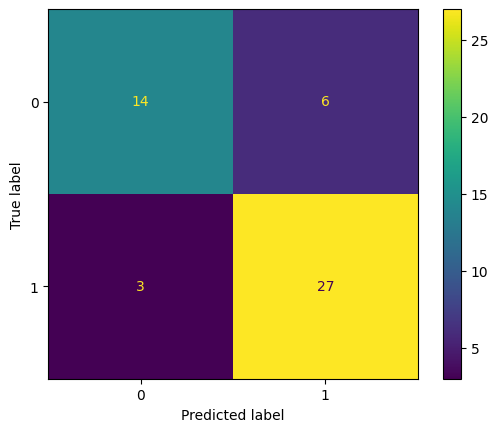

In [4]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

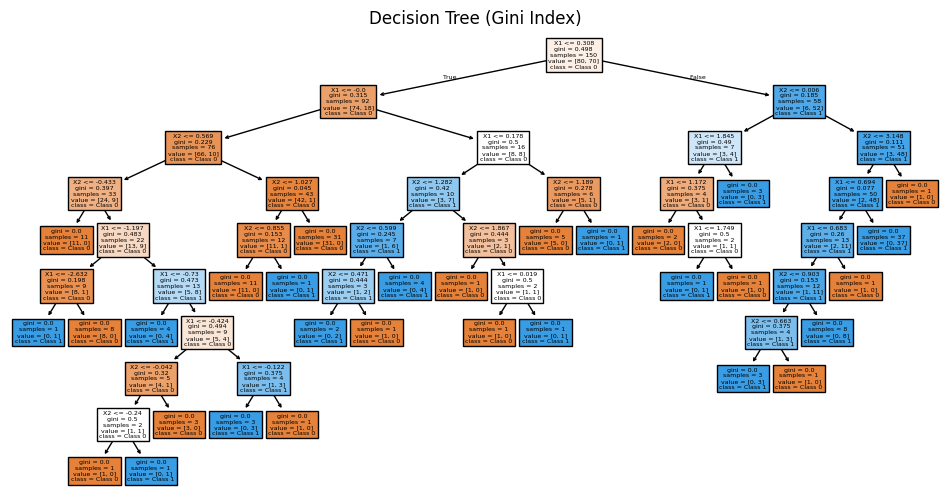

In [5]:
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=['X1', 'X2'], class_names=['Class 0', 'Class 1'])
plt.title("Decision Tree (Gini Index)")
plt.show()

In [7]:
param_grid = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Cross-Validation Accuracy: 0.8333333333333334
